### **Installing Packages**
* Dataset Link : https://www.kaggle.com/team-ai/spam-text-message-classification

In [22]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 119kB/s 
     |████████████████████████████████| 6.8MB 39.6MB/s 
     |████████████████████████████████| 983kB 42.8MB/s 
     |████████████████████████████████| 266kB 48.4MB/s 
     |████████████████████████████████| 1.9MB 35.3MB/s 
     |████████████████████████████████| 1.2MB 42.9MB/s 
     |████████████████████████████████| 471kB 41.8MB/s 
     |████████████████████████████████| 901kB 36.1MB/s 
     |████████████████████████████████| 3.3MB 35.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.4-cp37-none-any.whl size=25282461 sha256=cbd3fb90fe0bb9eb94a2321eeea915dbf42b02ff6071413bad7165dab79550b8
  Stored in directory: /root/.cache/pip/wheels/95/cc/1b/84c3799864cd864b99d94a8aeac2ee2d928fb3d0ec3d3f1a13
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=d3e16d3417b555dbe86c13f13d252e6964dcee8df451096b0a11860f3a40d824
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

### **Importing packages**

In [31]:
import tensorflow as tf
import numpy as np
import pickle
import pandas as pd
import ktrain
from ktrain import text

In [24]:
tf.__version__

'2.5.0'

In [67]:
ktrain.__version__

'0.26.4'

### **Simple Preprocessing**
* I will not clean dataset I will directly load the dataset.

In [56]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [57]:
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [58]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [59]:
labels = pd.get_dummies(df['Category'])
new_df = pd.concat([df, labels], axis=1)
new_df = new_df.drop(['Category'], axis=1)

In [19]:
new_df.head()

Message  ham  spam
0  Go until jurong point, crazy.. Available only ...    1     0
1                      Ok lar... Joking wif u oni...    1     0
2  Free entry in 2 a wkly comp to win FA Cup fina...    0     1
3  U dun say so early hor... U c already then say...    1     0
4  Nah I don't think he goes to usf, he lives aro...    1     0

In [20]:
new_df.to_csv('train.csv', index=False)

### ***Training***

In [25]:
DATA_PATH = 'train.csv'
NUM_WORDS = 10000
MAXLEN = 1000
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'Message',
                      label_columns = ['ham', 'spam'],
                      val_filepath=None, 
                      max_features=NUM_WORDS,
                      maxlen=MAXLEN,
                      encoding= 'utf-8')

['ham', 'spam']
      ham  spam
4550    1     0
3773    1     0
3974    1     0
1304    1     0
1847    1     0
['ham', 'spam']
      ham  spam
3063    1     0
2660    1     0
444     1     0
978     1     0
3340    1     0
language: en
Word Counts: 8503
Nrows: 5014
5014 train sequences
train sequence lengths:
	mean : 16
	95percentile : 33
	99percentile : 53
x_train shape: (5014,1000)
y_train shape: (5014, 2)
Is Multi-Label? False
558 test sequences
test sequence lengths:
	mean : 16
	95percentile : 34
	99percentile : 62
x_test shape: (558,1000)
y_test shape: (558, 2)


In [28]:
model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 1000
done.


In [32]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
157/157 [==============================] - 6s 13ms/step - loss: 0.7876 - accuracy: 0.6017
Epoch 2/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.7933 - accuracy: 0.5866
Epoch 3/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.7609 - accuracy: 0.6087
Epoch 4/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.7548 - accuracy: 0.6191
Epoch 5/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.6216 - accuracy: 0.6917
Epoch 6/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.4136 - accuracy: 0.8287
Epoch 7/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.1903 - accuracy: 0.9296
Epoch 8/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.1225 - accuracy: 0.9589
Epoch 9/1024
157/157 [==============================] - 2s 13ms/step - loss: 0.2611 - accurac

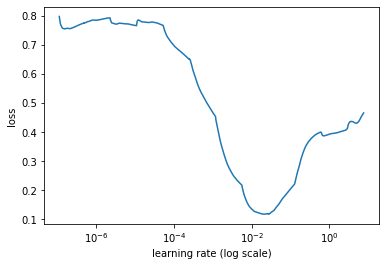

In [33]:
learner.lr_find()
learner.lr_plot()

In [34]:
learner.autofit(0.001)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
157/157 [==============================] - 3s 17ms/step - loss: 0.5016 - accuracy: 0.7806 - val_loss: 0.4819 - val_accuracy: 0.8584
Epoch 2/1024
157/157 [==============================] - 2s 16ms/step - loss: 0.2912 - accuracy: 0.8879 - val_loss: 0.3155 - val_accuracy: 0.8925
Epoch 3/1024
157/157 [==============================] - 2s 15ms/step - loss: 0.1907 - accuracy: 0.9296 - val_loss: 0.1537 - val_accuracy: 0.9767
Epoch 4/1024
157/157 [==============================] - 2s 16ms/step - loss: 0.1259 - accuracy: 0.9561 - val_loss: 0.0690 - val_accuracy: 0.9821
Epoch 5/1024
157/157 [==============================] - 2s 15ms/step - loss: 0.0971 - accuracy: 0.9689 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 6/1024
157/157 [==============================] - 2s 15ms/step - loss: 0.0706 - accur

### **Saving Model** 

In [35]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [37]:
predictor.save('spam_text_message')
print('MODEL SAVED')

MODEL SAVED


### **Get Prediction**

In [40]:
spam_messages = [
                 'Hi i am spam 1',
                 'Hi how are you',
                 'oh whatever'
]

In [41]:
predictor.predict(spam_messages)

['ham', 'ham', 'ham']

#### **Loading Model**

In [42]:
# Loading the model and assign it to the predictor
loaded_model = ktrain.load_predictor('/content/spam_text_message')

In [43]:
loaded_model.predict(spam_messages)

['ham', 'ham', 'ham']

### **Saving and Loading Model - Deployment**

In [83]:
import pickle
from tensorflow.keras.models import load_model 

In [84]:
features = pickle.load(open('/content/category/tf_model.preproc','rb'))
new_model = load_model('/content/category/tf_model.h5')
# labels should be in order
labels = ['ham', 'spam']

In [85]:
text = 'hey i am spam'
preproc_text = features.preprocess(['Hi I am HAM'])

In [88]:
result = new_model.predict(preproc_text)

In [89]:
result

array([[9.9999797e-01, 2.0015173e-06]], dtype=float32)

In [87]:
label = labels[result[0].argmax(axis=0)]
score = ('{:.2f}'.format(round(np.max(result[0]), 2)*100))
print('LABEL :', label, 'SCORE :', score)

LABEL : ham SCORE : 100.00
